In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from deep_convnet import DeepConvNet
%matplotlib inline

from common.functions import softmax

Using TensorFlow backend.


In [2]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 正規化
x_test = x_test.reshape(-1, 1, 28, 28).astype(np.float32) / 255

In [3]:
eps_list = [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

In [4]:
network = DeepConvNet()

network.load_params("deep_convnet_params.pkl")
print("loaded Network Parameters!")

loaded Network Parameters!


In [5]:
def generate_adv(x, label, network, eps=0.01):
    d, g = network.gradient_for_fgsm(x.reshape(1, 1, 28, 28), np.array([label]))
    d = d.reshape(28, 28)
    p = eps * np.sign(d)
    adv = (x + p).clip(min=0, max=1)
    adv = adv.reshape(1, 1, 28, 28)
    return adv

In [6]:
def change_adv_list(x_list, t_list, network, eps):
    adv_list = []
    for x, t in zip(x_list, t_list):
        adv = generate_adv(x, t, network, eps)
        adv_list.append(adv.reshape(1, 28, 28))
        
    adv_list = np.array(adv_list)
    return adv_list

eps 0
正答率： 0.9925
eps 0.01
正答率： 0.9911
eps 0.1
正答率： 0.9455
eps 0.2
正答率： 0.7422
eps 0.3
正答率： 0.3727
eps 0.4
正答率： 0.1876
eps 0.5
正答率： 0.1313
eps 0.6
正答率： 0.1116


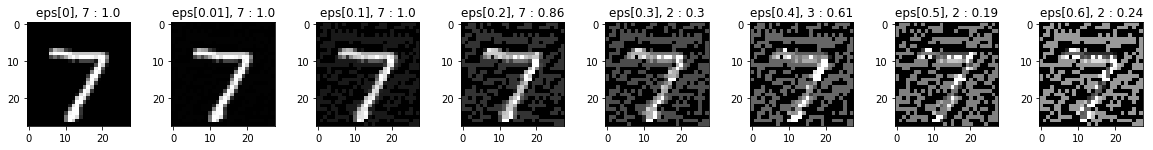

In [7]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
for i, eps in enumerate(eps_list):
    print("eps", eps)
    fgsm_test = change_adv_list(x_test, t_test, network, eps)
    print("正答率：", network.accuracy(fgsm_test, t_test))
    ax = fig.add_subplot(1, len(eps_list), i+1)
    ax.imshow(fgsm_test[0].reshape(28,28), 'gray')
    adv_pre = network.predict(fgsm_test[0].reshape(1, 1, 28, 28))
    adv_label = np.argmax(adv_pre)
    adv_score = round(max(softmax(adv_pre[0])), 2)
    ax.set_title(f"eps[{eps}], {adv_label} : {adv_score}")

plt.show()